# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

In [8]:
#將「輸入層」與「隱藏層」加入模型

In [9]:
model.add(Dense(units=1000, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [10]:
#將「輸出層」加入模型

In [11]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [12]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [13]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [14]:
train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2, 
                        epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
9s - loss: 0.2942 - acc: 0.9151 - val_loss: 0.1529 - val_acc: 0.9567
Epoch 2/10
9s - loss: 0.1179 - acc: 0.9658 - val_loss: 0.1078 - val_acc: 0.9674
Epoch 3/10
10s - loss: 0.0759 - acc: 0.9782 - val_loss: 0.0919 - val_acc: 0.9724
Epoch 4/10
12s - loss: 0.0514 - acc: 0.9854 - val_loss: 0.0876 - val_acc: 0.9738
Epoch 5/10
12s - loss: 0.0359 - acc: 0.9901 - val_loss: 0.0752 - val_acc: 0.9763
Epoch 6/10
12s - loss: 0.0255 - acc: 0.9934 - val_loss: 0.0737 - val_acc: 0.9778
Epoch 7/10
11s - loss: 0.0183 - acc: 0.9958 - val_loss: 0.0712 - val_acc: 0.9798
Epoch 8/10
10s - loss: 0.0132 - acc: 0.9971 - val_loss: 0.0722 - val_acc: 0.9788
Epoch 9/10
12s - loss: 0.0090 - acc: 0.9985 - val_loss: 0.0716 - val_acc: 0.9805
Epoch 10/10
12s - loss: 0.0064 - acc: 0.9991 - val_loss: 0.0722 - val_acc: 0.9795


# 以圖形顯示訓練過程

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

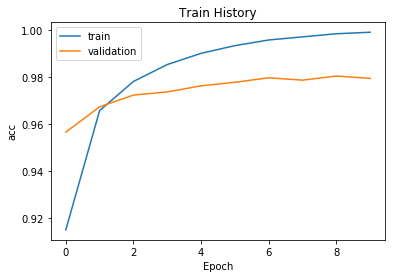

In [16]:
show_train_history(train_history,'acc','val_acc')

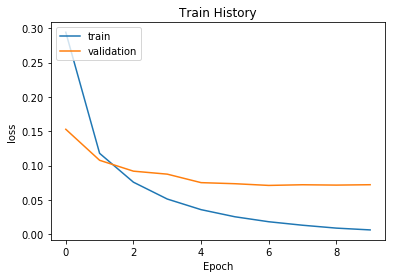

In [17]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [18]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

 9728/10000 [============================>.] - ETA: 0s()
('accuracy=', 0.97940000000000005)


# 進行預測

In [19]:
prediction=model.predict_classes(x_Test)

 9824/10000 [============================>.] - ETA: 0s

In [20]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [21]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

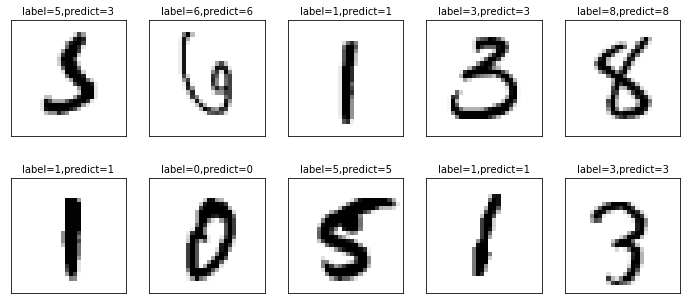

In [22]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

# confusion matrix

In [ ]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

In [ ]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

In [ ]:
df[(df.label==2)&(df.predict==1)]

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)